In [2]:
%run model.ipynb
import pandas as pd

'' is not a valid SBML 'SId'.


## Targeted gene knockout strategies
***
Using the Kegg database, a few target reactions have been found tthat might increase geranyl-PP concentrations in Aspergillus niger. Geranyl-pp is an essential metabolite for the production of THC thus increasing its concentrations might increase THC production. 

### The target reactions:

- Geranyl-PP -> (E,E)-Famesyl-PP
- Geranyl-PP -> Hexaprenyl-PP

In [3]:
#first we find the essential genes of A. niger
essentiality = {}
model.objective = {model.reactions.DRAIN_Biomass: 1}
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)



In [4]:
print(essentiality)

{<Gene 1128503 at 0x1e691276280>: 0.9398547241492334, <Gene 1145456 at 0x1e691276340>: 0.9398547241493491, <Gene 1155770 at 0x1e691276190>: 0.9398547241493491, <Gene 1143538 at 0x1e691276040>: 0.9398547241493491, <Gene 1146031 at 0x1e6912763a0>: 0.9256883175021038, <Gene 1126547 at 0x1e691276130>: 0.9398547241492676, <Gene 1128684 at 0x1e691276220>: 0.9097997964718153, <Gene 1146884 at 0x1e6912761f0>: 0.9398547241492193, <Gene 1145051 at 0x1e6912763d0>: 0.9097997964716905, <Gene 1141976 at 0x1e691276400>: 0.939854724149237, <Gene 1144773 at 0x1e691276430>: 0.9398547241492604, <Gene 1145793 at 0x1e691276460>: 0.8368898546966085, <Gene 1148178 at 0x1e691276490>: 0.836889854696603, <Gene 1145895 at 0x1e6912764c0>: 0.9398547241491945, <Gene 1124768 at 0x1e6912764f0>: 0.9398547241492703, <Gene 1183468 at 0x1e691276520>: 0.9398547241492703, <Gene 1113563 at 0x1e691276550>: 0.8569316227682299, <Gene 1184650 at 0x1e691276580>: 0.8576013494114453, <Gene 1031996 at 0x1e6912765b0>: 0.939854724149

<AxesSubplot:ylabel='Frequency'>

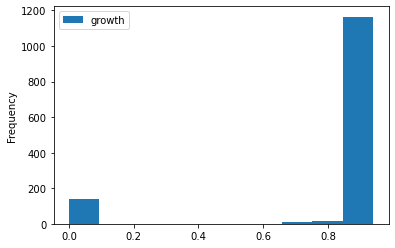

In [5]:
df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')
df.plot.hist()

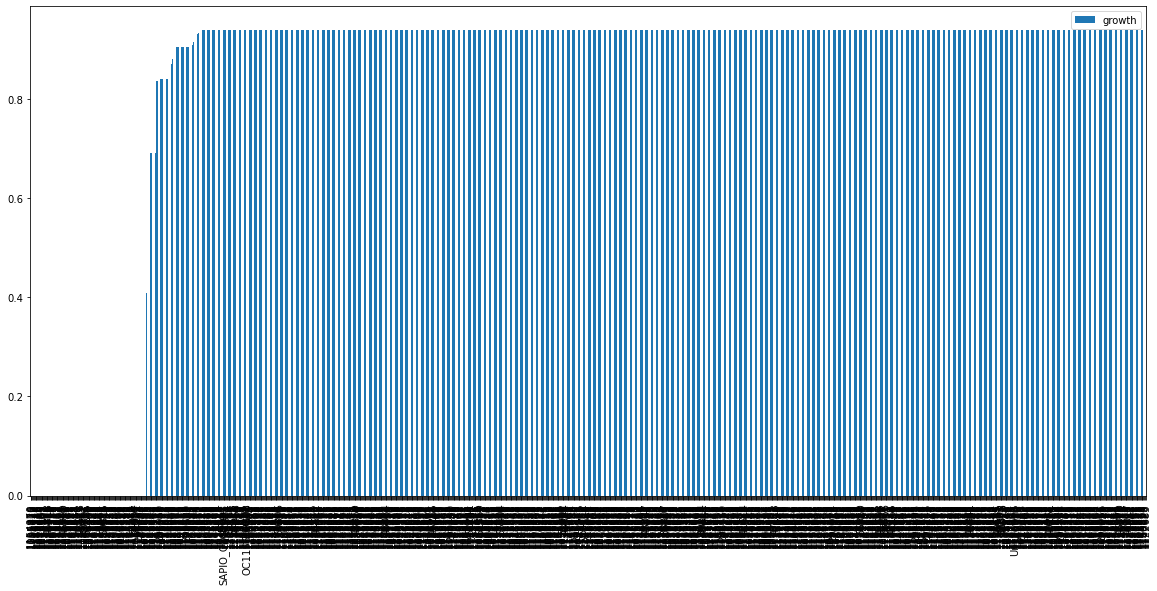

In [6]:
ax = df.plot.bar().axes
ax.figure.set_size_inches(20, 9)

The results show that there are no gene knockouts that increase THC flux, only reactions that decrease the flux. 